In [189]:
import os
import warnings
import pandas as pd
import numpy as np
import re
import glob

from rolestereotype import RoleStereotype as rs
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
sns.set_style(style='white')
%matplotlib inline

In [190]:
# create the list of selected projects 

path  = '../../data/SourceProjects/Mobile/'
projects = [projects for projects in os.listdir(path) if not projects.startswith('.')]
projects

['gnucash-android-2.4.1',
 'Telecine-1.6.2',
 'bitcoin-wallet-6.31',
 'TweetLanes-1.4.1',
 'Timber-1.8',
 'Omni-Notes-6.0.5',
 'AmazeFileManager-3.5.2',
 'AntennaPod-2.1.1',
 'keepassdroid-2.5.9',
 'OpenTripPlanner-for-Android-2.1.5',
 'materialistic-3.3',
 'k-9-5.600',
 'Telegram-6.1.1_1946',
 'SeeWeather-2.03',
 'Signal-Android-4.60.5']

In [191]:
rstr = [str(r) for r in rs]

In [192]:
# describe
datasets = dict()

for prj in projects:
    # role stereotype classification results
    files_rs = glob.glob(f"../../data/RoleStereotype/Mobile/{prj}/*-features-classified.csv")
    df_rs = pd.read_csv(files_rs[0])
    datasets[prj] = df_rs

In [193]:
mobile_rs_df = pd.DataFrame()
for prj,df in datasets.items():
  df['project'] = [prj] * df.shape[0]
  mobile_rs_df = mobile_rs_df.append(df)

mobile_rs_df.drop(columns=['index', 'classname', 'Unnamed: 0'], inplace=True)
project = list(mobile_rs_df['project'])
mobile_rs_df.drop(columns=['project'], inplace=True)
mobile_rs_df.insert(1, 'Project', project) 
mobile_rs_df.head()


,Fullpathname,Project,Classname,loc,numAttr,numMethod,setters,getters,isPersist,isCollection,...,isInterface,isInnerClass,isClass,isEnum,classPublicity,numPublicMethods,numPrivateMethods,numProtectedMethods,isAbstract,label
0,gnucash-android-v2.4.1/app/src/main/java/org/g...,gnucash-android-2.4.1,GnuCashApplication,371,15,23,2,14,True,False,...,False,False,True,False,public,0,0,0,False,Interfacer
1,gnucash-android-v2.4.1/app/src/main/java/org/g...,gnucash-android-2.4.1,BookDbHelper,186,3,5,0,1,True,False,...,False,False,True,False,public,0,0,0,False,Service Provider
2,gnucash-android-v2.4.1/app/src/main/java/org/g...,gnucash-android-2.4.1,DatabaseCursorLoader,148,3,7,0,0,False,False,...,False,False,True,False,public,0,0,0,True,Service Provider
3,gnucash-android-v2.4.1/app/src/main/java/org/g...,gnucash-android-2.4.1,DatabaseHelper,362,10,5,0,0,True,False,...,False,False,True,False,public,0,0,0,False,Service Provider
4,gnucash-android-v2.4.1/app/src/main/java/org/g...,gnucash-android-2.4.1,DatabaseSchema,277,4,0,0,0,False,False,...,False,False,True,False,public,0,0,0,False,Information Holder


In [194]:
# mobile_rs_df.to_csv('../../results/csv/mobile_rs.csv')

In [195]:
mobile_rs_df.shape

(4746, 29)

In [196]:
mobile_rs_df.head()

,Fullpathname,Project,Classname,loc,numAttr,numMethod,setters,getters,isPersist,isCollection,...,isInterface,isInnerClass,isClass,isEnum,classPublicity,numPublicMethods,numPrivateMethods,numProtectedMethods,isAbstract,label
0,gnucash-android-v2.4.1/app/src/main/java/org/g...,gnucash-android-2.4.1,GnuCashApplication,371,15,23,2,14,True,False,...,False,False,True,False,public,0,0,0,False,Interfacer
1,gnucash-android-v2.4.1/app/src/main/java/org/g...,gnucash-android-2.4.1,BookDbHelper,186,3,5,0,1,True,False,...,False,False,True,False,public,0,0,0,False,Service Provider
2,gnucash-android-v2.4.1/app/src/main/java/org/g...,gnucash-android-2.4.1,DatabaseCursorLoader,148,3,7,0,0,False,False,...,False,False,True,False,public,0,0,0,True,Service Provider
3,gnucash-android-v2.4.1/app/src/main/java/org/g...,gnucash-android-2.4.1,DatabaseHelper,362,10,5,0,0,True,False,...,False,False,True,False,public,0,0,0,False,Service Provider
4,gnucash-android-v2.4.1/app/src/main/java/org/g...,gnucash-android-2.4.1,DatabaseSchema,277,4,0,0,0,False,False,...,False,False,True,False,public,0,0,0,False,Information Holder


In [197]:
mobile_rs_df.groupby('Project')[['Fullpathname']].count()

,Fullpathname
Project,
AmazeFileManager-3.5.2,265
AntennaPod-2.1.1,387
Omni-Notes-6.0.5,159
OpenTripPlanner-for-Android-2.1.5,53
SeeWeather-2.03,29
Signal-Android-4.60.5,1332
Telecine-1.6.2,23
Telegram-6.1.1_1946,679
Timber-1.8,163


In [198]:
merged_dataset = dict()
# join design smell data with rolestereotypes:
mobile_ds_df = pd.read_csv('../../results/csv/mobile_ds.csv')

# generate common identifier
# mobile_rs_df['subpathname'] = [n.replace('/', '.') for n in mobile_rs_df['Fullpathname']]
# mobile_ds_df['classname2'] = [re.sub(r".*\.", '', n) for n in mobile_ds_df['FullClassPath']]
# generate common identifier
mobile_rs_df['classname2'] = [re.sub(r".*[\\/]|\.java$", '', n).replace(".", "$") for n in mobile_rs_df['Fullpathname']]
mobile_ds_df['classname2'] = [re.sub(r".*\.", '', n) for n in mobile_ds_df['FullClassPath']]

# join the 2 dataframes
# mobile_rs_df.rename(columns={'loc': 'loc_1'}, inplace=True)
df_merged = pd.merge(mobile_ds_df, mobile_rs_df, on= "classname2", how= "inner")
# datasets[prj] = df_merged

# line = f"{prj:24} ({df_merged.shape[0]:4} classes)"
# ct = df_merged['label'].value_counts(ascending=True, sort=False)
# print(f"{line} {',  '.join([f'{r}:{ct[r] if r in ct.keys() else 0:4}' for r in rstr])}")
df_merged

,Unnamed: 0,FullClassPath,Project_x,SpeculativeGenerality,BaseClassKnowsDerivedClass,MessageChains,LongParameterList,SpaghettiCode,BaseClassShouldBeAbstract,LongMethod,...,isInterface,isInnerClass,isClass,isEnum,classPublicity,numPublicMethods,numPrivateMethods,numProtectedMethods,isAbstract,label
0,0,com.jakewharton.telecine.BugsnagTree,Telecine-v1.6.2,0,0,0,1,0,0,0,...,False,False,True,False,default,0,0,0,False,Service Provider
1,1,com.jakewharton.telecine.CaptureHelper,Telecine-v1.6.2,0,0,0,1,0,0,0,...,False,False,True,False,default,0,0,0,False,Service Provider
2,2,com.jakewharton.telecine.CheatSheet,Telecine-v1.6.2,0,0,0,0,0,0,1,...,False,False,True,False,default,0,0,0,False,Service Provider
3,2,com.jakewharton.telecine.CheatSheet,Telecine-v1.6.2,0,0,0,0,0,0,1,...,False,False,True,False,public,4,1,0,False,Service Provider
4,3,com.jakewharton.telecine.DeleteRecordingBroad...,Telecine-v1.6.2,0,0,0,0,0,0,0,...,False,False,True,False,public,0,0,0,False,Service Provider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1887,wallet.src.de.schildbach.wallet.ui.send.RaiseF...,Bitcoin-wallet-6.31,0,0,0,0,0,0,0,...,False,False,True,False,public,7,6,0,False,Interfacer
1977,1888,wallet.src.de.schildbach.wallet.ui.send.SendCo...,Bitcoin-wallet-6.31,0,0,0,0,0,0,0,...,False,False,True,False,public,12,21,0,False,Interfacer
1978,1889,wallet.src.de.schildbach.wallet.ui.send.SendCo...,Bitcoin-wallet-6.31,0,0,0,0,0,0,0,...,False,False,True,False,public,0,0,0,False,Information Holder
1979,1891,wallet.src.de.schildbach.wallet.ui.send.SweepW...,Bitcoin-wallet-6.31,0,0,0,0,0,0,0,...,False,False,True,False,public,7,8,0,False,Interfacer


In [199]:
df_merged.drop(columns=['Unnamed: 0'], inplace=True)

In [200]:
df_merged.drop_duplicates(subset=['FullClassPath'], inplace=True)

In [201]:
df_merged.shape

(1793, 50)

In [202]:
#df_merged.to_csv('../../results/csv/mobile_ds_rs.csv')

In [203]:
# line = f"{prj:24} ({df_merged.shape[0]:4} classes)"
ct = df_merged['label'].value_counts()
print(f"{',  '.join([f'{r}:{ct[r] if r in ct.keys() else 0:4}' for r in rstr])}")

Controller:  26,  Coordinator:  20,  Information Holder: 258,  Interfacer: 560,  Service Provider: 907,  Structurer:  22


In [204]:
# # for prj in projects:
# #     line = f"{prj:24} ({df_merged.shape[0]:4} classes)"
# ct = df_merged[['Project_x','label']].value_counts(ascending=True, sort=False)
# # print(f"{',  '.join([f'{r}:{ct[r] if r in ct.keys() else 0:4}' for r in rstr])}")
# # type(ct)
# ct.keys()[1]
df_merged.groupby(['Project_x','label'])[['FullClassPath']].count()

FullClassPath
Project_x                          label                            
AmazeFileManager-v3.5.2            Information Holder             15
                                   Interfacer                     41
                                   Service Provider               59
AntennaPod-v2.1.1                  Controller                      1
                                   Information Holder             14
                                   Interfacer                     41
                                   Service Provider               73
Bitcoin-wallet-6.31                Controller                      1
                                   Information Holder              9
                                   Interfacer                     13
                                   Service Provider                5
                                   Structurer                      3
Omni-Notes-v6.0.5                  Information Holder             14
                                   Interfacer                     15
                                   Service Provider               35
OpenTripPlanner-for-Android-v2.1.5 Information Holder              2
                                   Interfacer                      3
                                   Service Provider               13
SeeWeather-2.03                    Information Holder              7
                                   Interfacer                      4
                                   Service Provider                8
Signal-Android-4.60.5              Controller                      2
                                   Coordinator                     1
                                   Information Holder             51
                                   Interfacer                    162
                                   Service Provider              319
                                   Structurer                      4
Telecine-v1.6.2                    Interfacer                      3
                                   Service Provider                6
Timber-v1.8                        Information Holder             19
                                   Interfacer                     19
                                   Service Provider               40
TweetLanes-v1.4.1                  Information Holder             18
                                   Interfacer                     20
                                   Service Provider               35
gnucash-android-v2.4.1             Information Holder              8
                                   Interfacer                     23
                                   Service Provider               45
k-9-5.600                          Controller                      7
                                   Coordinator                    17
                                   Information Holder             36
                                   Interfacer                     19
                                   Service Provider               38
                                   Structurer                     12
keepassdroid-v2.5.9                Information Holder             21
                                   Interfacer                     13
                                   Service Provider               66
materialistic-v3.3                 Coordinator                     2
                                   Interfacer                     17
                                   Service Provider               32
telegram-v6.1.1                    Controller                     15
                                   Information Holder             44
                                   Interfacer                    167
                                   Service Provider              133
                                   Structurer                      3

In [205]:
metrics = "AntiSingleton,BaseClassKnowsDerivedClass,BaseClassShouldBeAbstract,Blob,ClassDataShouldBePrivate,ComplexClass,FunctionalDecomposition,LargeClass,LazyClass,LongMethod,LongParameterList,ManyFieldAttributesButNotComplex,MessageChains,RefusedParentBequest,SpaghettiCode,SpeculativeGenerality,SwissArmyKnife,TraditionBreaker".split(",")
len(metrics)

18

In [206]:
metrics_def = {
    "AntiSingleton":"A class that provides mutable class variables, which consequently could be used as global variables.",
    "BaseClassKnowsDerivedClass": "A class that has many subclasses without being abstract.",
    "BaseClassShouldBeAbstract": "A class that has many subclasses without being abstract.",
    "Blob": "A large controller class that depends on data stored in surrounding data classes. A large class declares many fields and methods with a low cohesion.",
    "ClassDataShouldBePrivate": "A class exposing its fields, violating the principle of data hiding.",
    "ComplexClass" : "A class having at least one method having a high cyclomatic complexity.",
    "FunctionalDecomposition": "A main class with a procedural name in which inheritance and polymorphism are scarcely used.",
		"LargeClass": "A class that has grown too large in term of Lines of Code.",
    "LazyClass": "A class having very small dimension, few methods and low complexity.",
		"LongMethod": "A method that is unduly long in terms of lines of code.",
    "LongParameterList": "A method having a long list of parameters, some of which avoidable.",
    "ManyFieldAttributesButNotComplex": "A class that declares many attributes but which is not complex and, hence, more likely to be some kind of data class holding values without providing behaviour.",
    "MessageChains": "A long chain of method invocations performed to implement a class functionality.", 
    "RefusedParentBequest": "A class redefining most of the inherited methods, thus signaling a wrong hierarchy.",
    "SpaghettiCode": "A class implementing complex methods interacting between them, with no parameters, using global variables.",
    "SpeculativeGenerality": "A class declared as abstract having very few children classes using its methods.",
    "SwissArmyKnife": "A complex class that offers a high number of services, for example, a complex class implementing a high number of interfaces.",
    "TraditionBreaker": "A class that inherits from a large parent class but that provides little behaviour and without subclasses."
  }

In [207]:
# sort projects by loc in descending order
prj_order = list(df_merged.groupby(['Project_x']).sum()['loc'].sort_values(ascending=False).keys())
prj_order

['telegram-v6.1.1',
 'Signal-Android-4.60.5',
 'k-9-5.600',
 'AntennaPod-v2.1.1',
 'AmazeFileManager-v3.5.2',
 'TweetLanes-v1.4.1',
 'gnucash-android-v2.4.1',
 'Timber-v1.8',
 'keepassdroid-v2.5.9',
 'Omni-Notes-v6.0.5',
 'materialistic-v3.3',
 'Bitcoin-wallet-6.31',
 'OpenTripPlanner-for-Android-v2.1.5',
 'SeeWeather-2.03',
 'Telecine-v1.6.2']

In [208]:
for m in metrics:
    print(f"{m}: {df_merged[m].sum()}")

AntiSingleton: 85
BaseClassKnowsDerivedClass: 0
BaseClassShouldBeAbstract: 28
Blob: 62
ClassDataShouldBePrivate: 232
ComplexClass: 1026
FunctionalDecomposition: 0
LargeClass: 2
LazyClass: 250
LongMethod: 918
LongParameterList: 365
ManyFieldAttributesButNotComplex: 10
MessageChains: 0
RefusedParentBequest: 1
SpaghettiCode: 4
SpeculativeGenerality: 8
SwissArmyKnife: 0
TraditionBreaker: 0


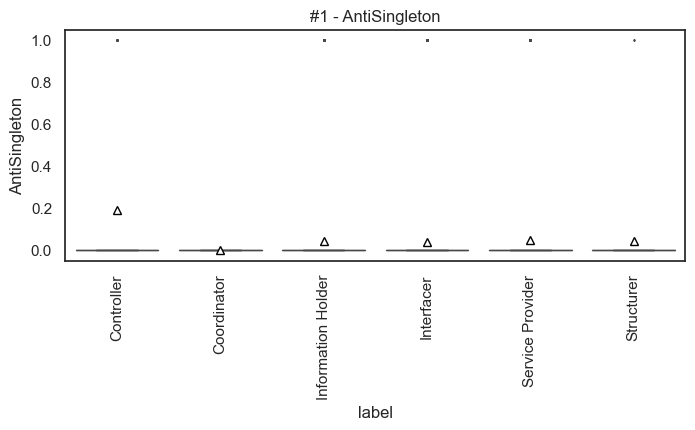

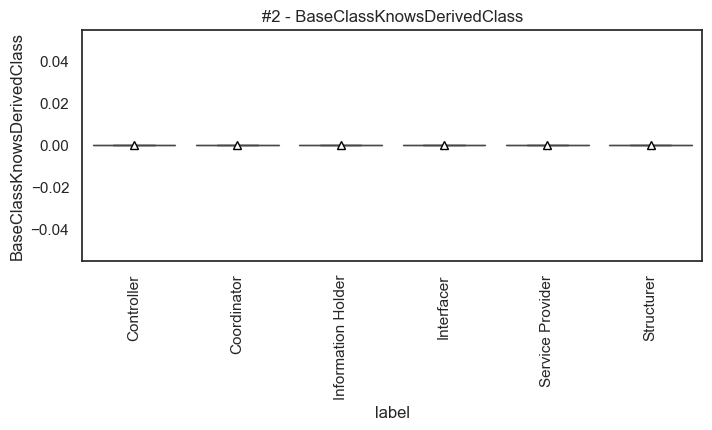

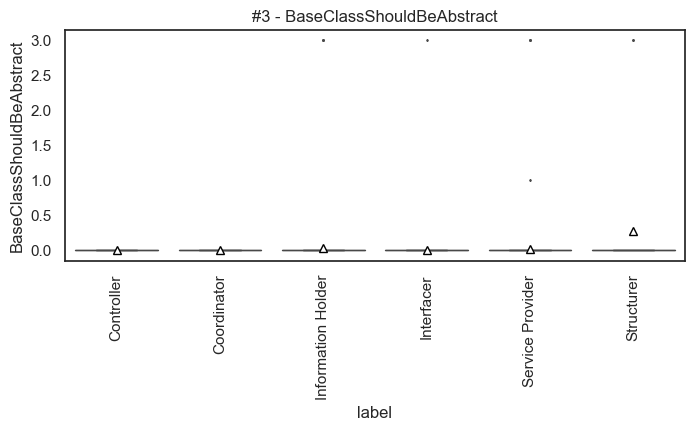

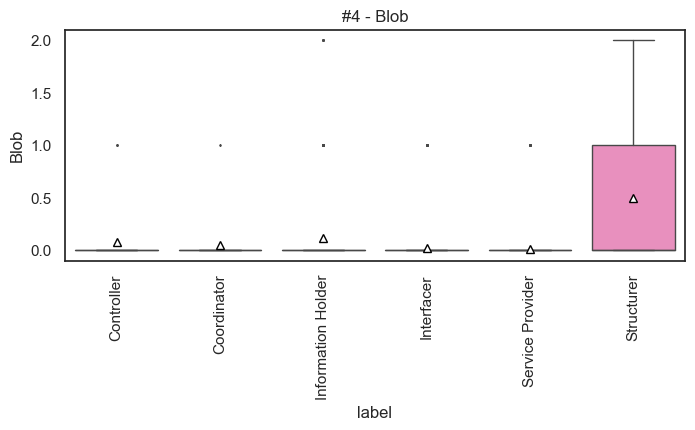

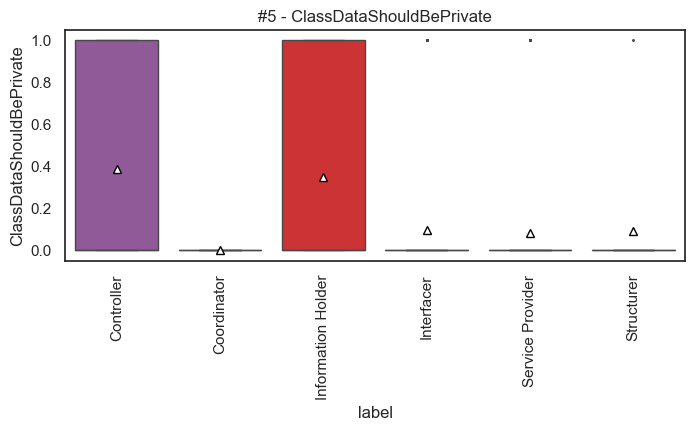

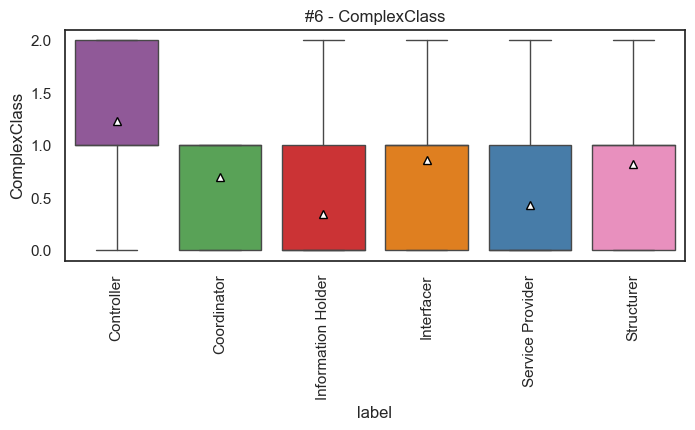

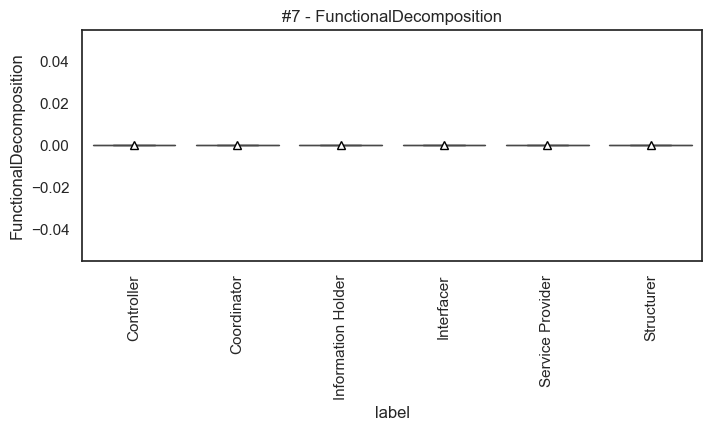

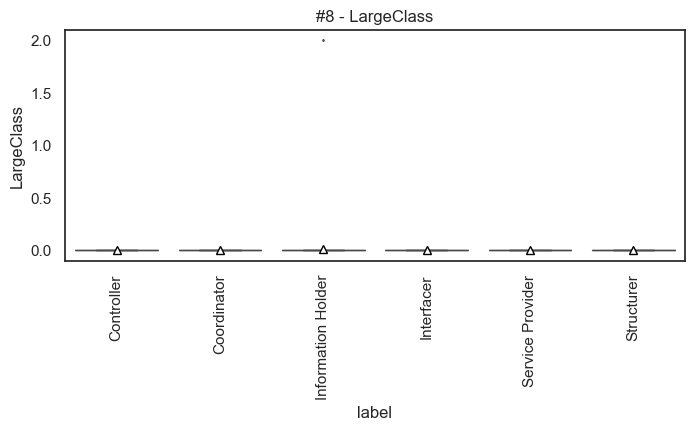

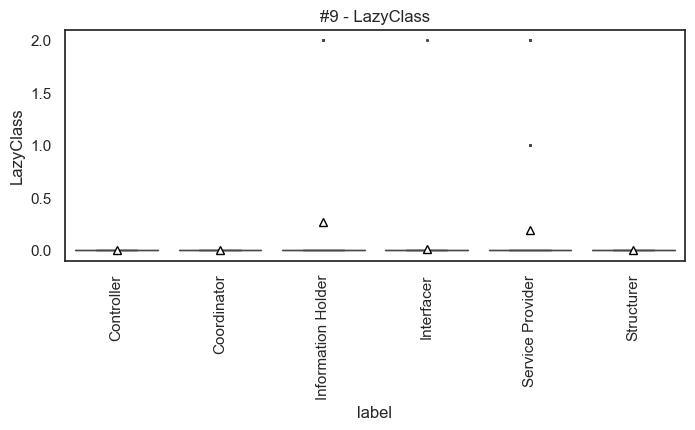

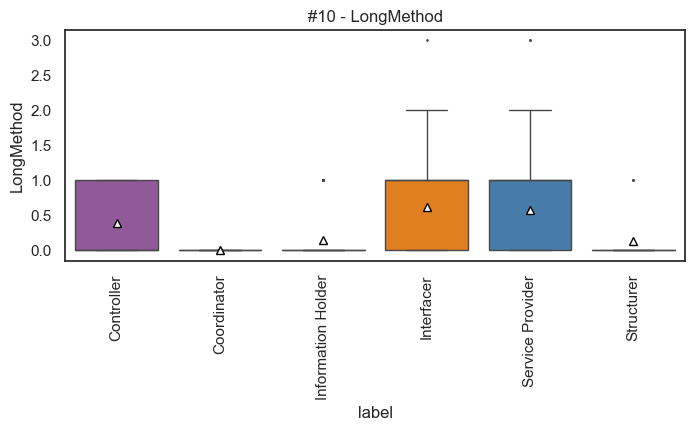

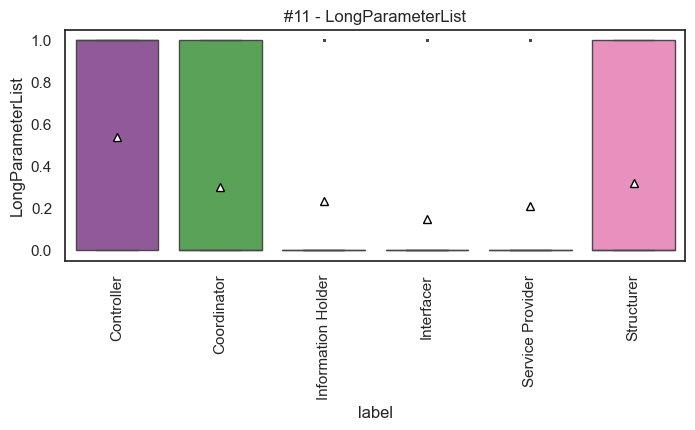

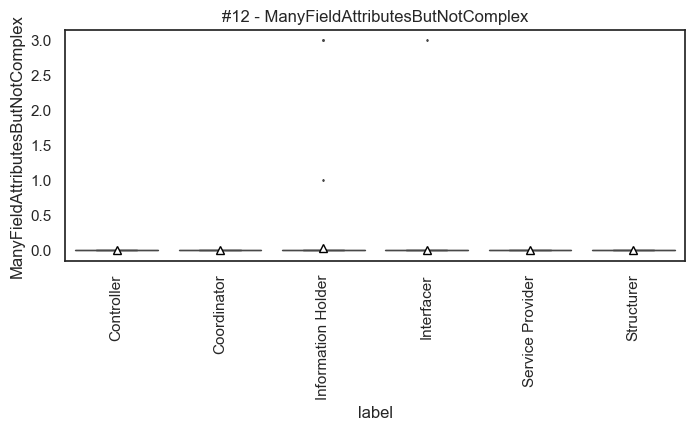

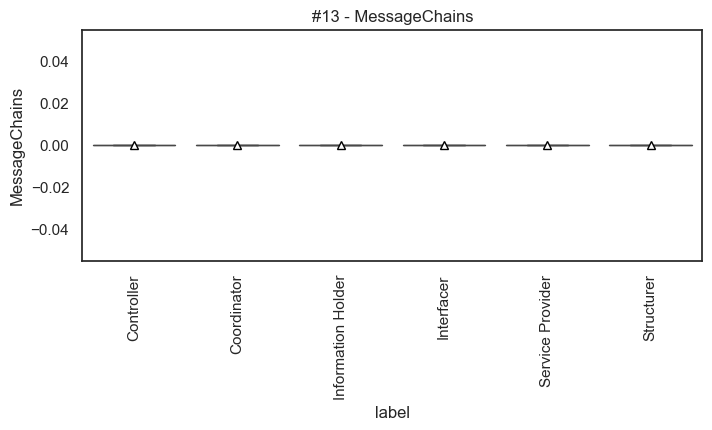

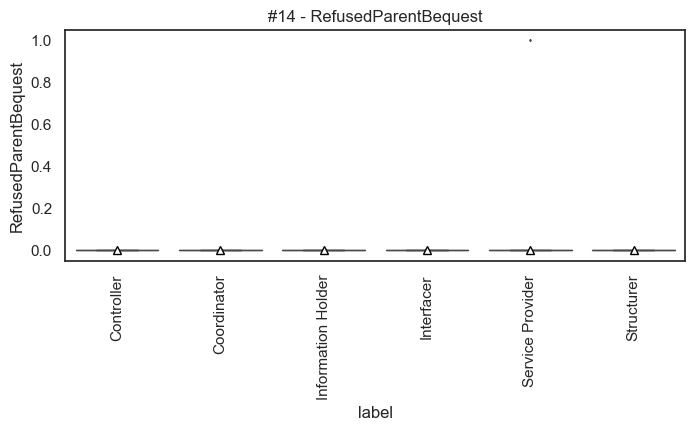

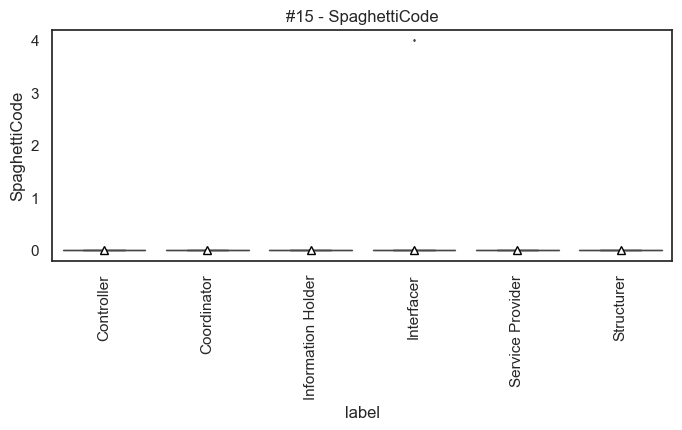

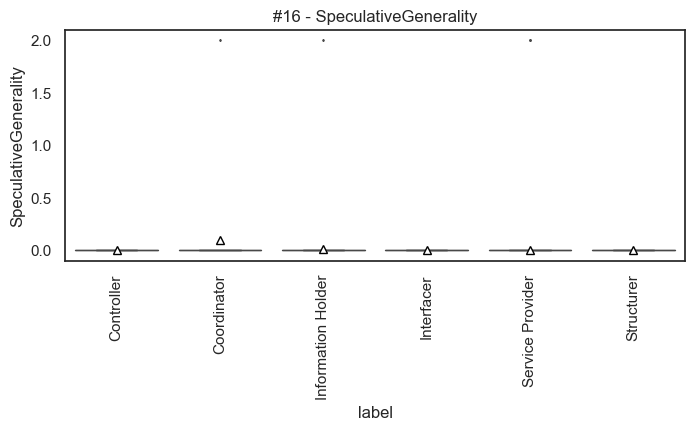

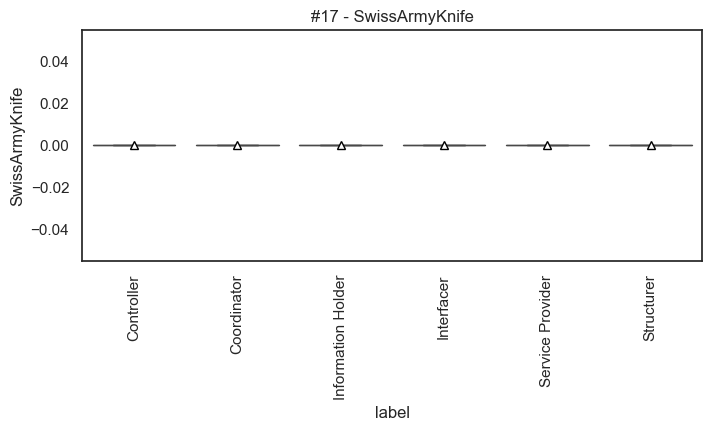

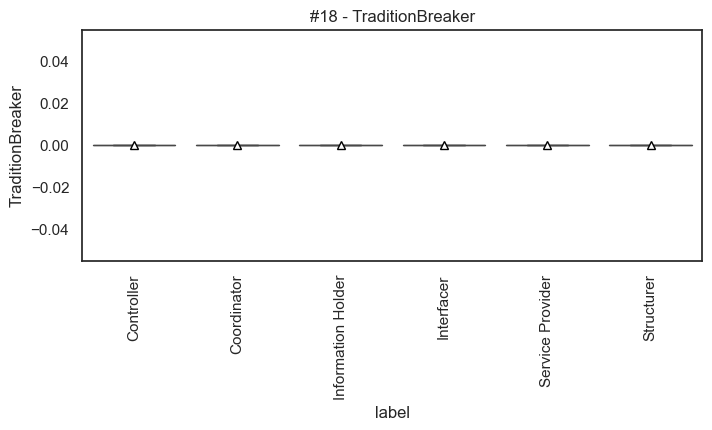

In [209]:
i = 0
for m in metrics:
    plt.figure(i, figsize=(8,3))

    g = sns.boxplot(x='label', y=m,
        palette=rs.dpalette(),
        order=rstr,
        linewidth=1, fliersize=1,
        showmeans=True,
        meanprops = {"markerfacecolor":"white", "markeredgecolor": "black"},
        data=df_merged)
    mn = df_merged[m].min() 
    mx = df_merged[m].max()
    # g.set(ylim=(mn,mx), title=f'#{i+1} - {m}')
    g.set(title=f'#{i+1} - {m}')

    plt.xticks(rotation = 90)
    plt.show()
    i += 1

[AntiSingleton]
A class that provides mutable class variables, which consequently could be used as global variables.


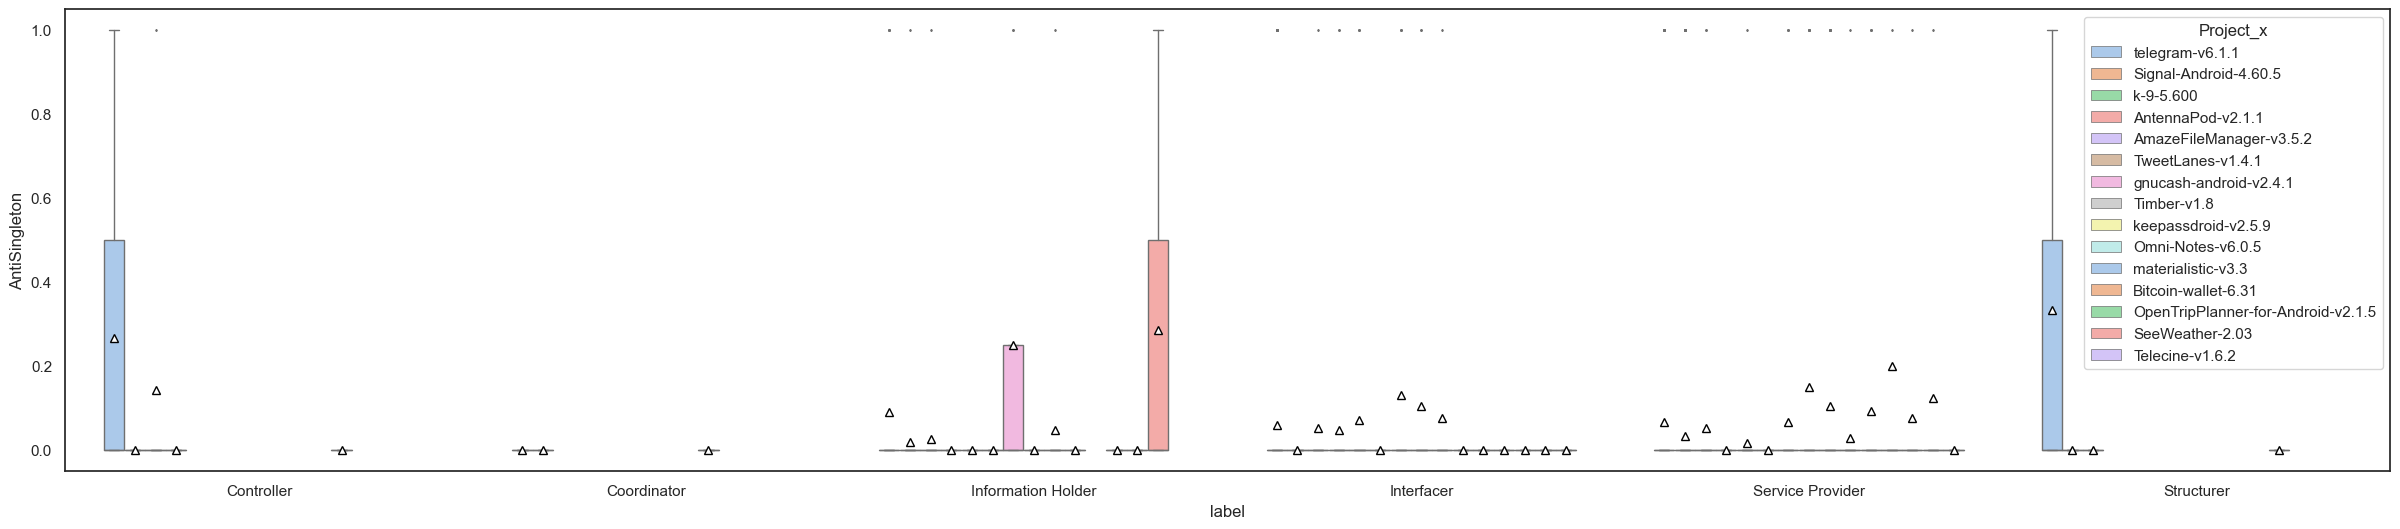

[BaseClassKnowsDerivedClass]
A class that has many subclasses without being abstract.


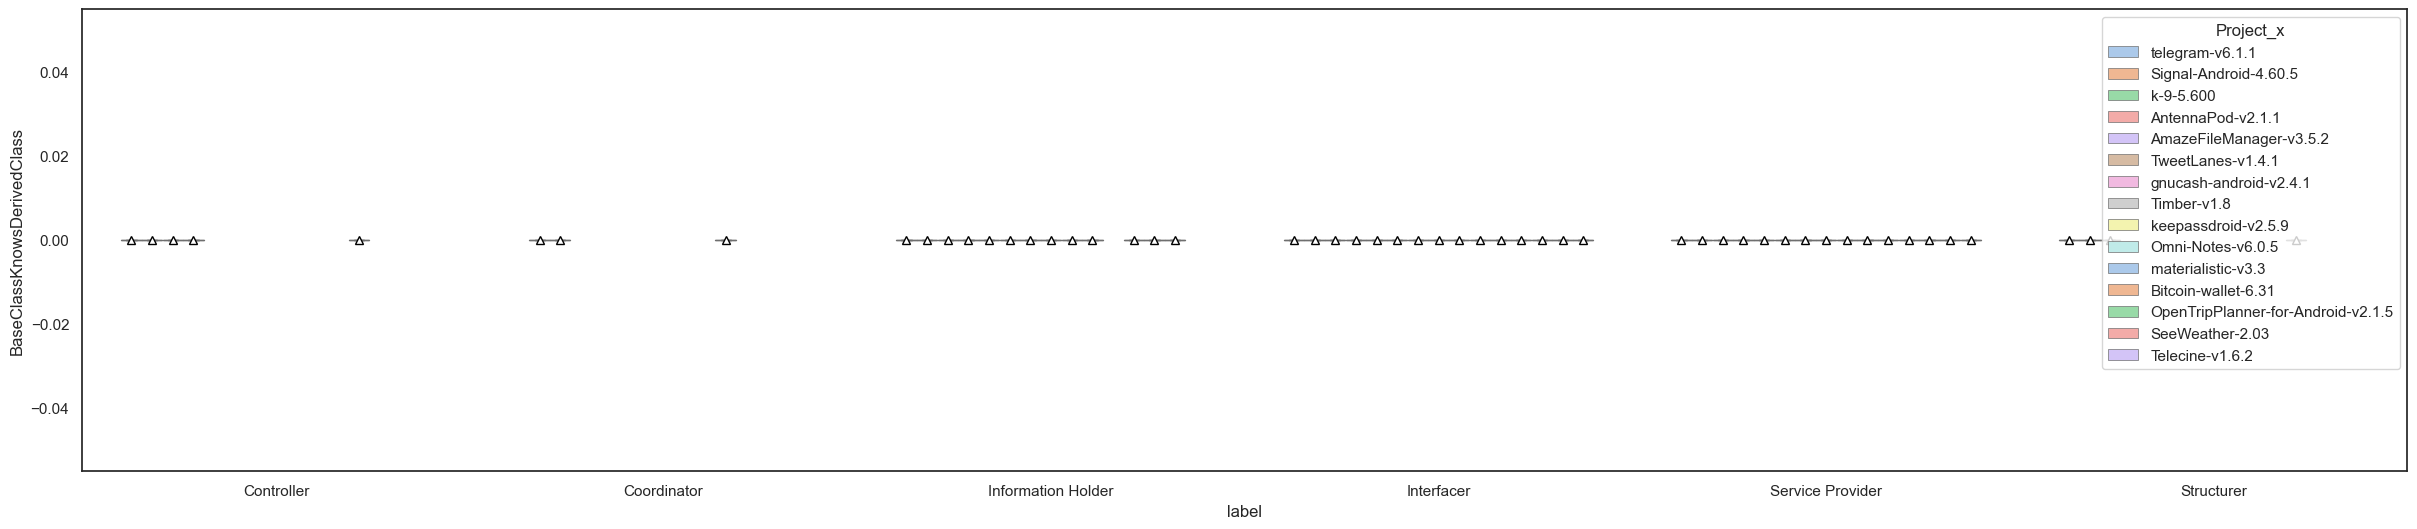

[BaseClassShouldBeAbstract]
A class that has many subclasses without being abstract.


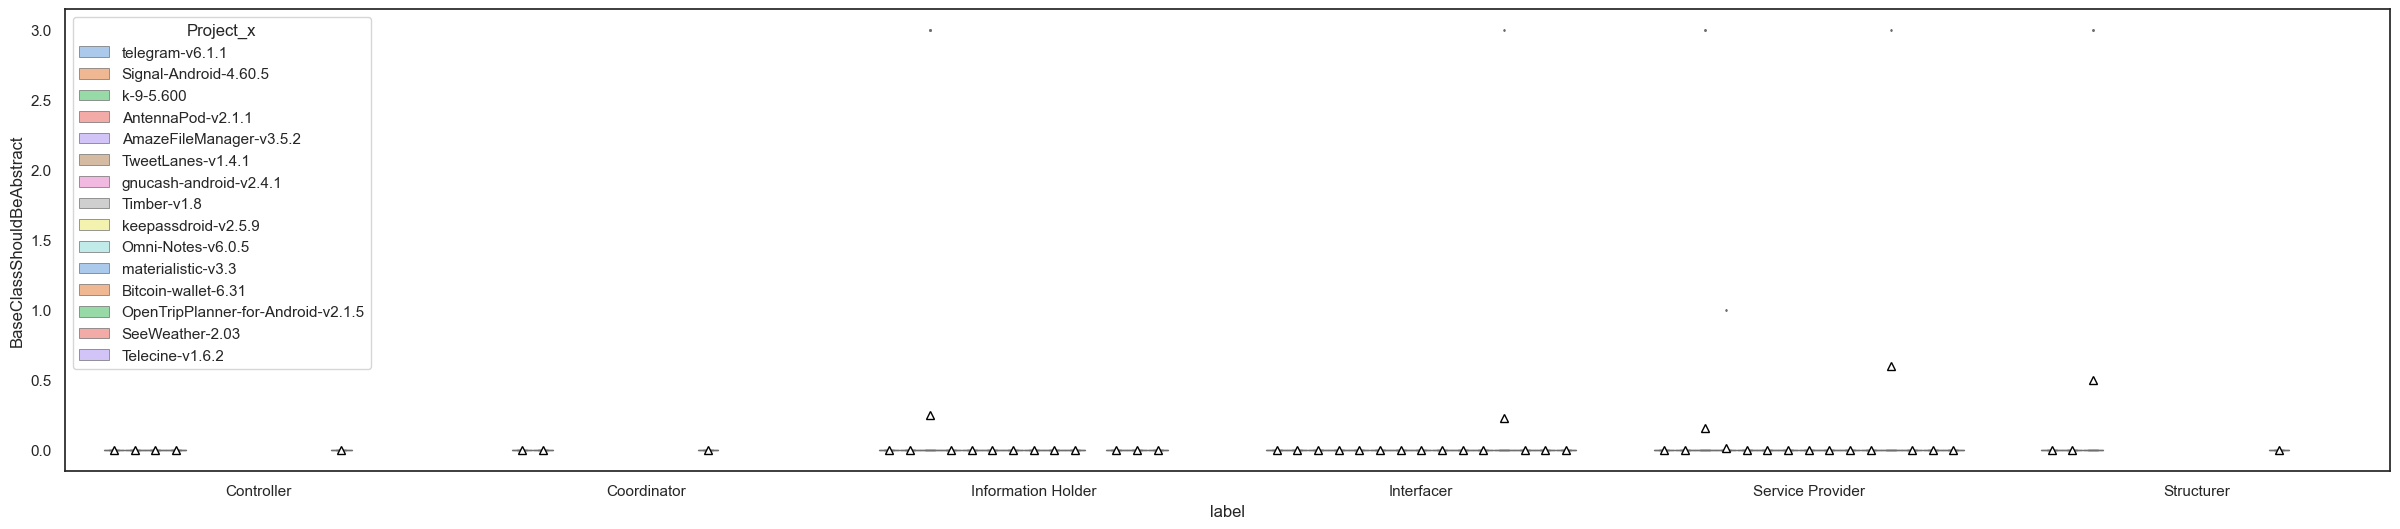

[Blob]
A large controller class that depends on data stored in surrounding data classes. A large class declares many fields and methods with a low cohesion.


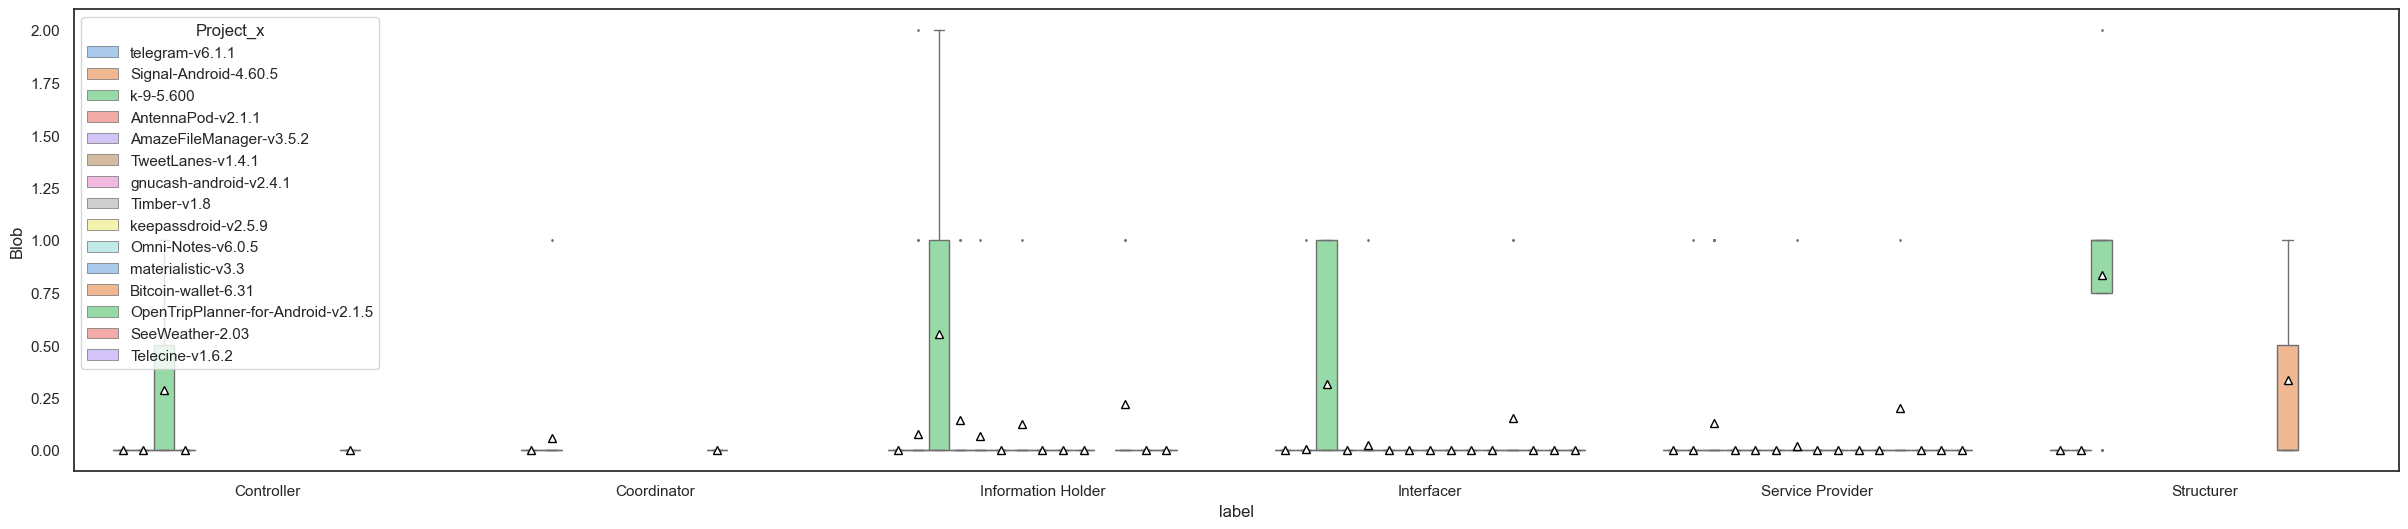

[ClassDataShouldBePrivate]
A class exposing its fields, violating the principle of data hiding.


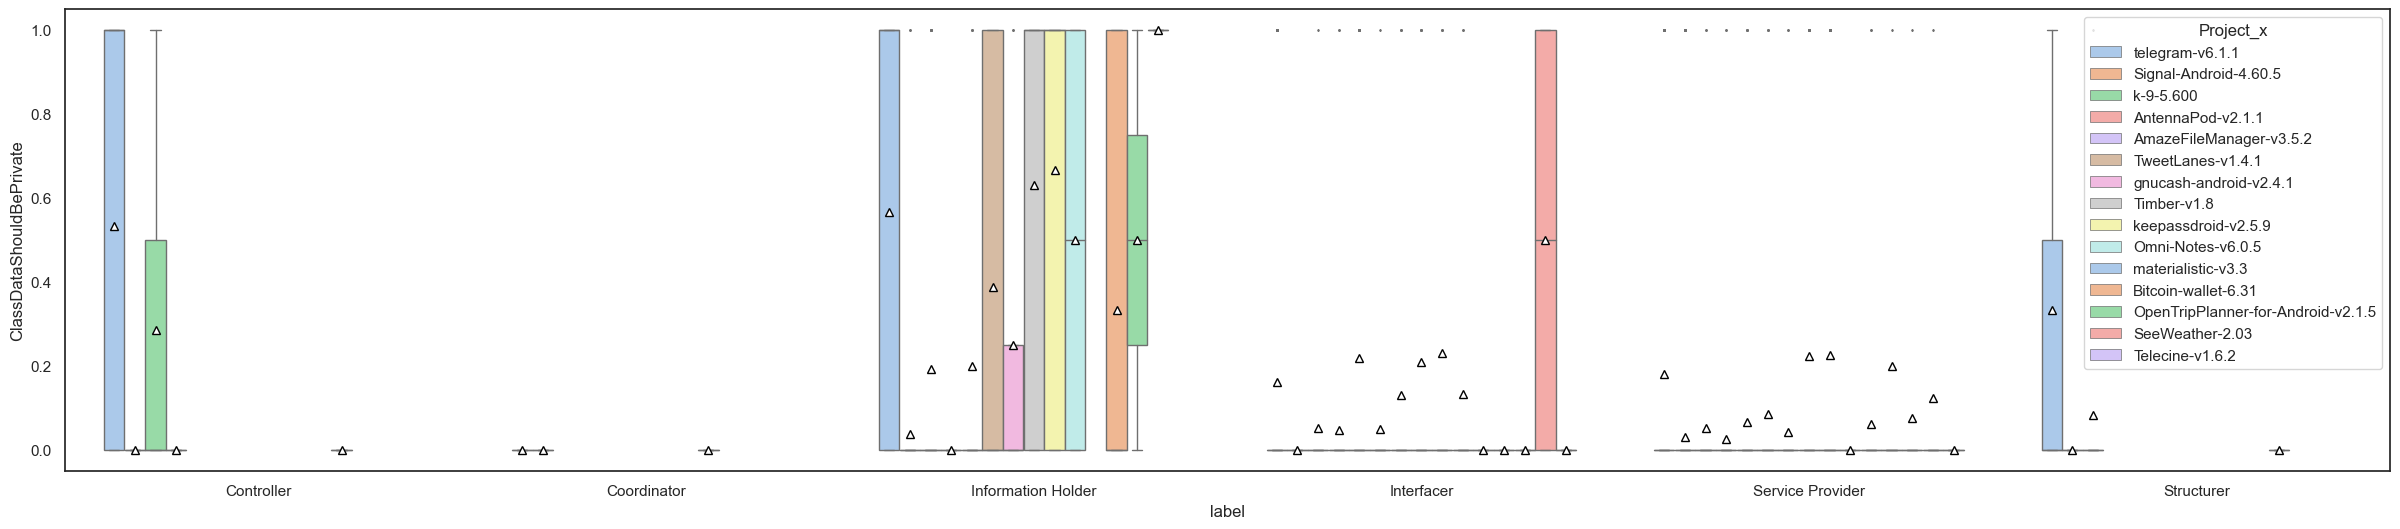

[ComplexClass]
A class having at least one method having a high cyclomatic complexity.


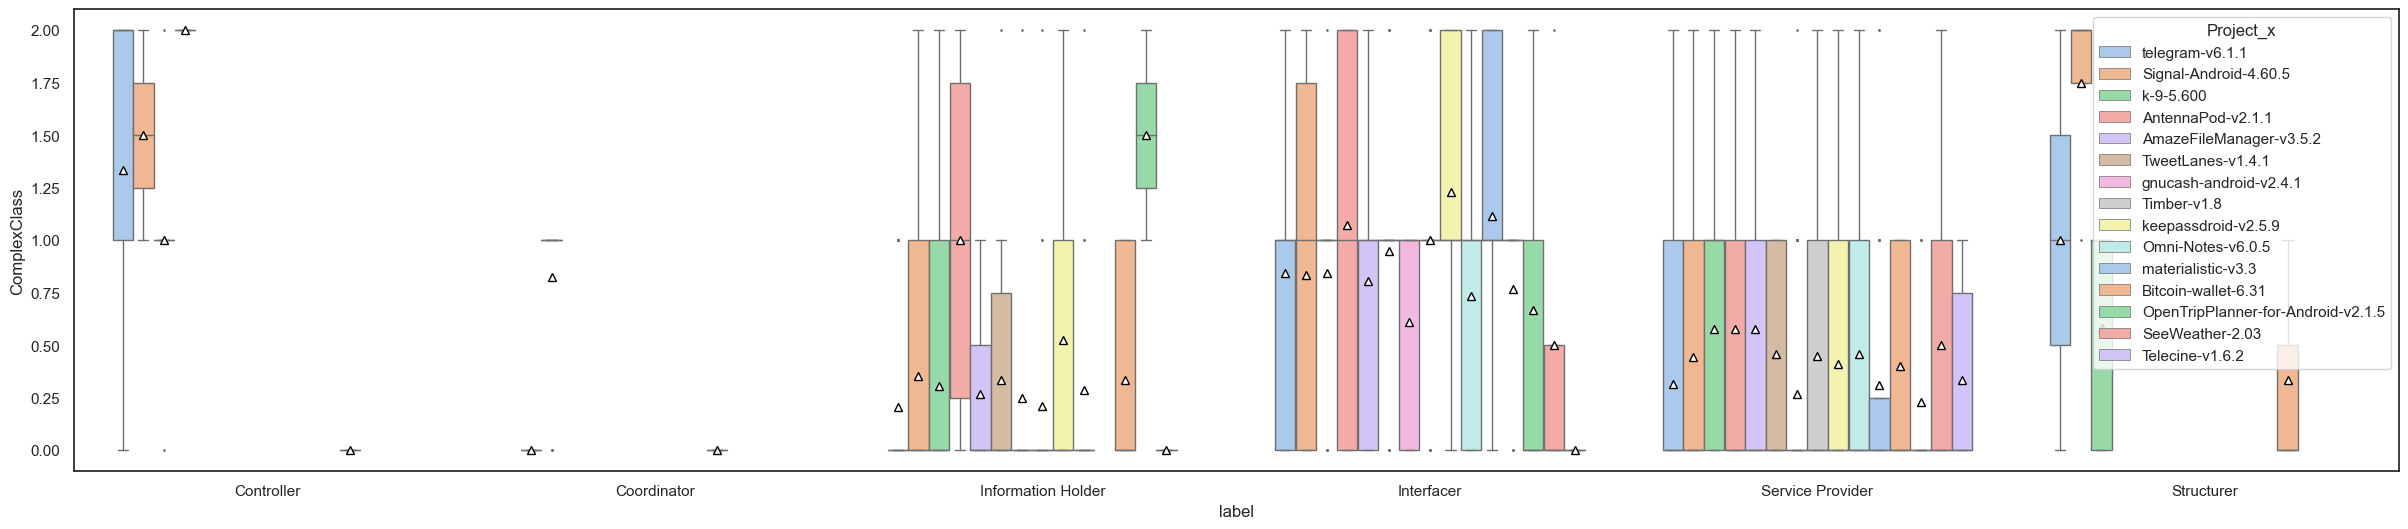

[FunctionalDecomposition]
A main class with a procedural name in which inheritance and polymorphism are scarcely used.


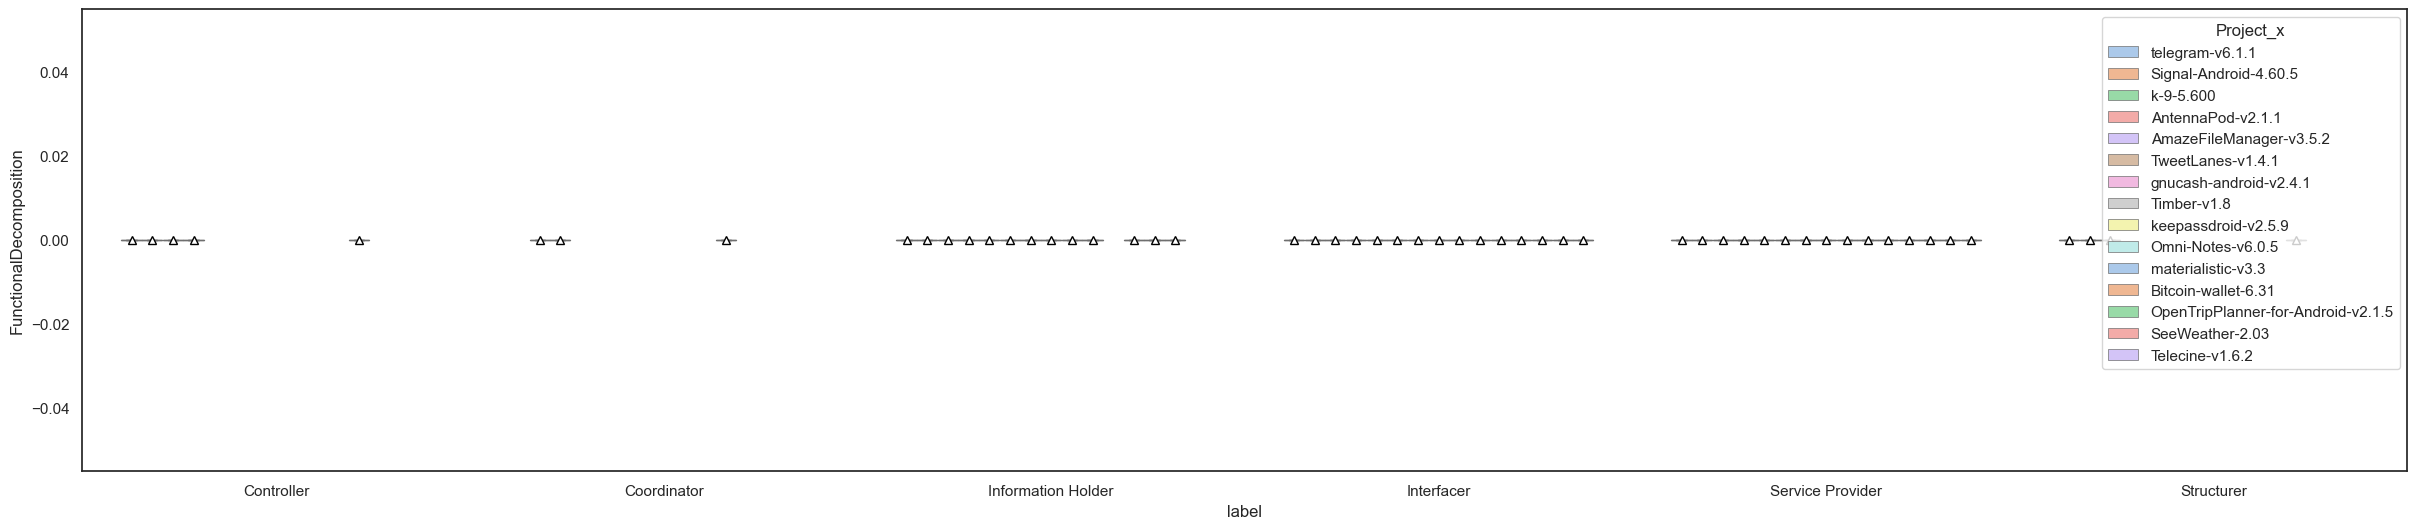

[LargeClass]
A class that has grown too large in term of Lines of Code.


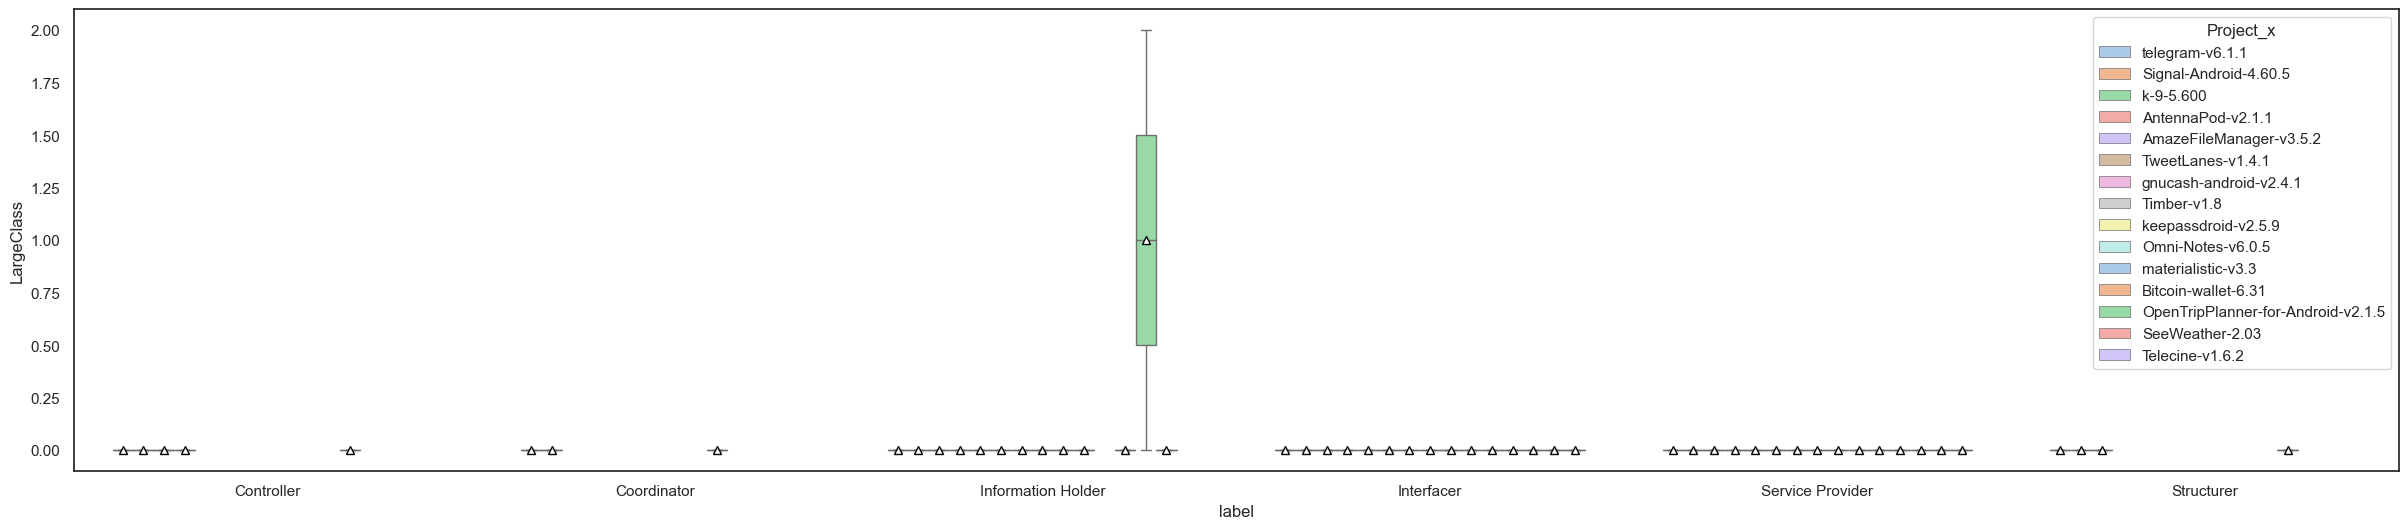

[LazyClass]
A class having very small dimension, few methods and low complexity.


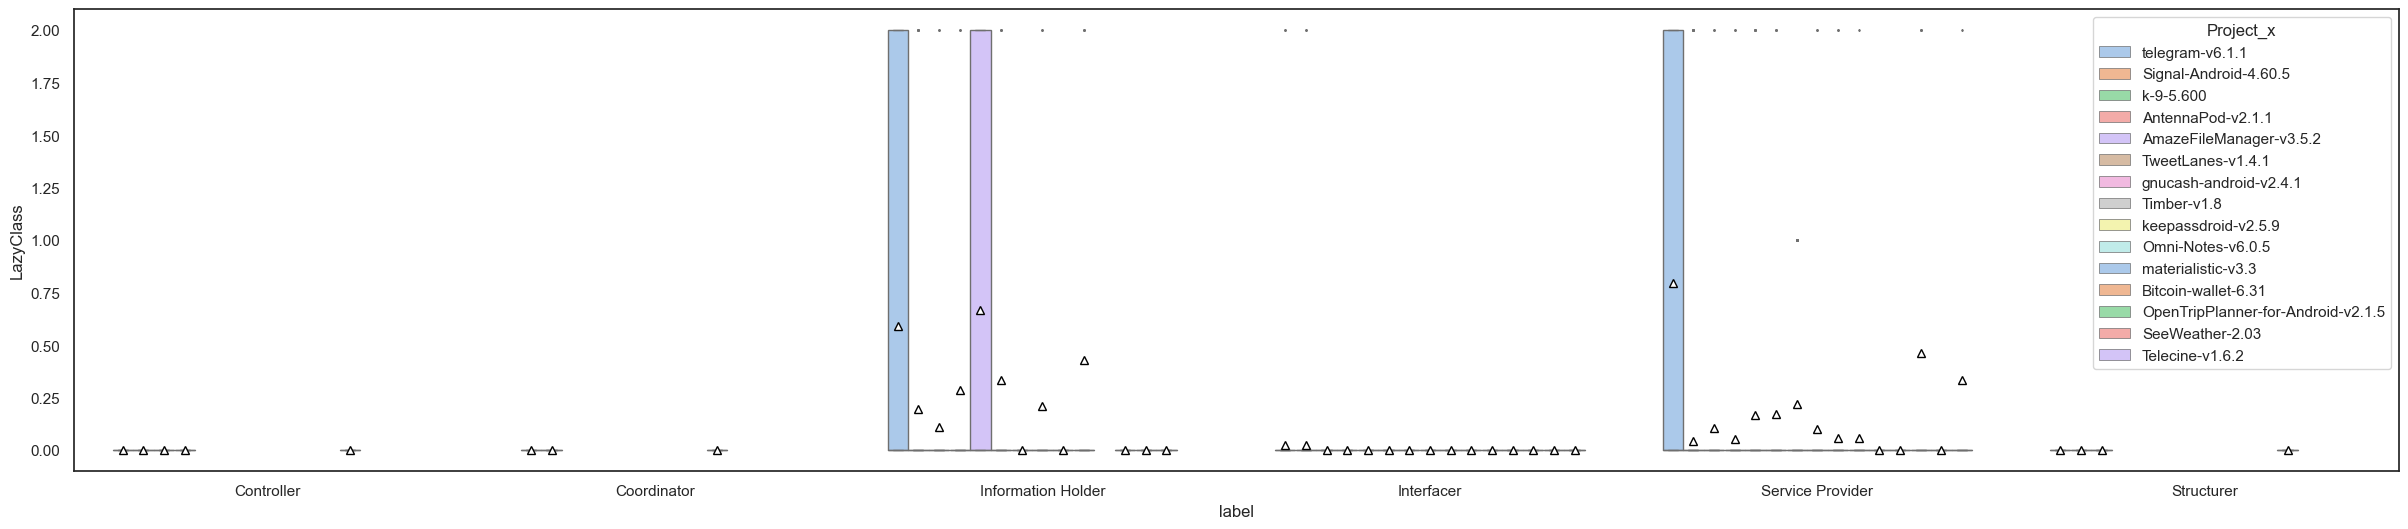

[LongMethod]
A method that is unduly long in terms of lines of code.


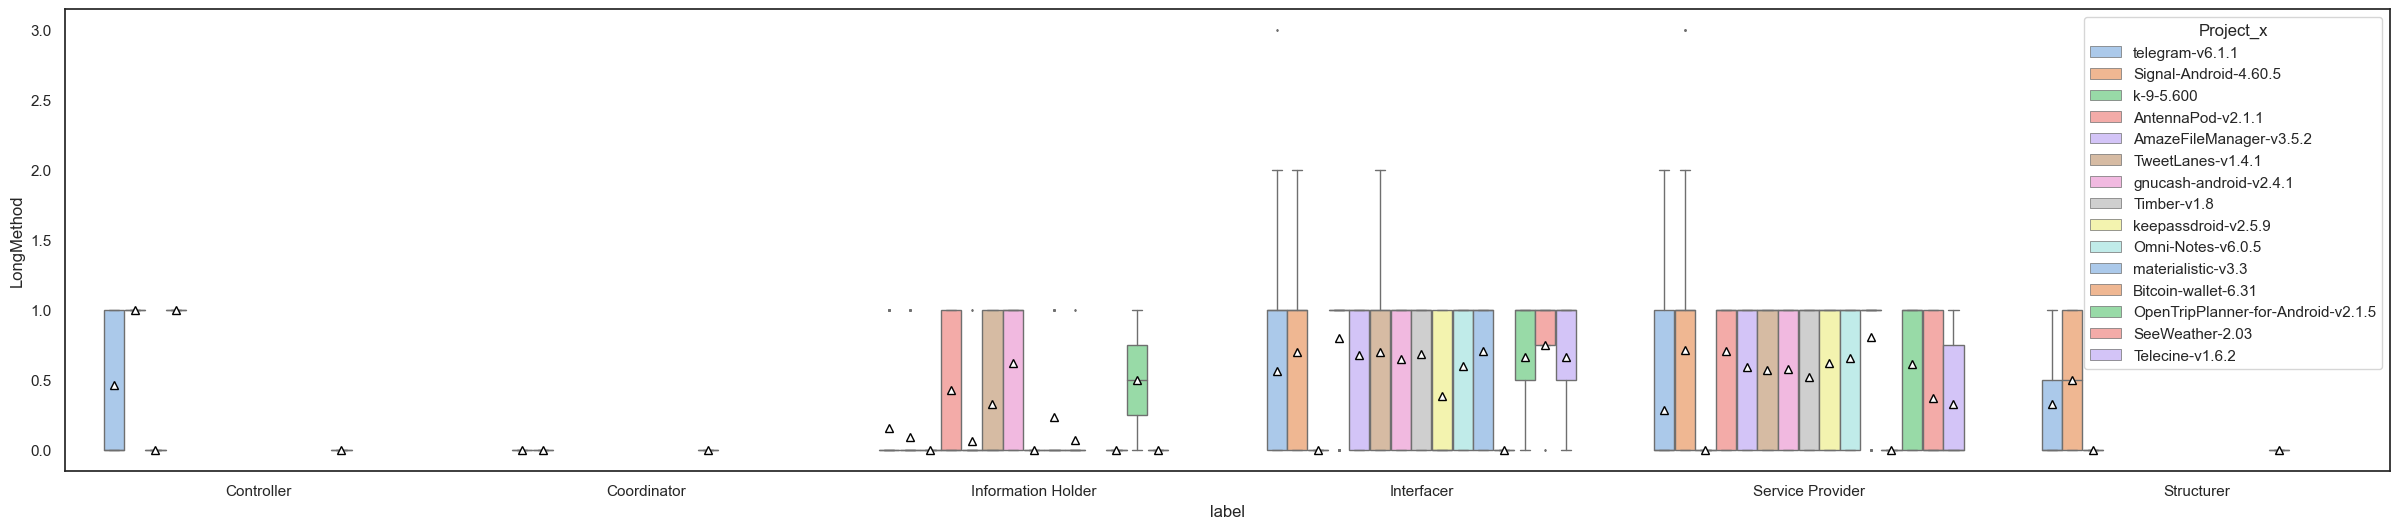

[LongParameterList]
A method having a long list of parameters, some of which avoidable.


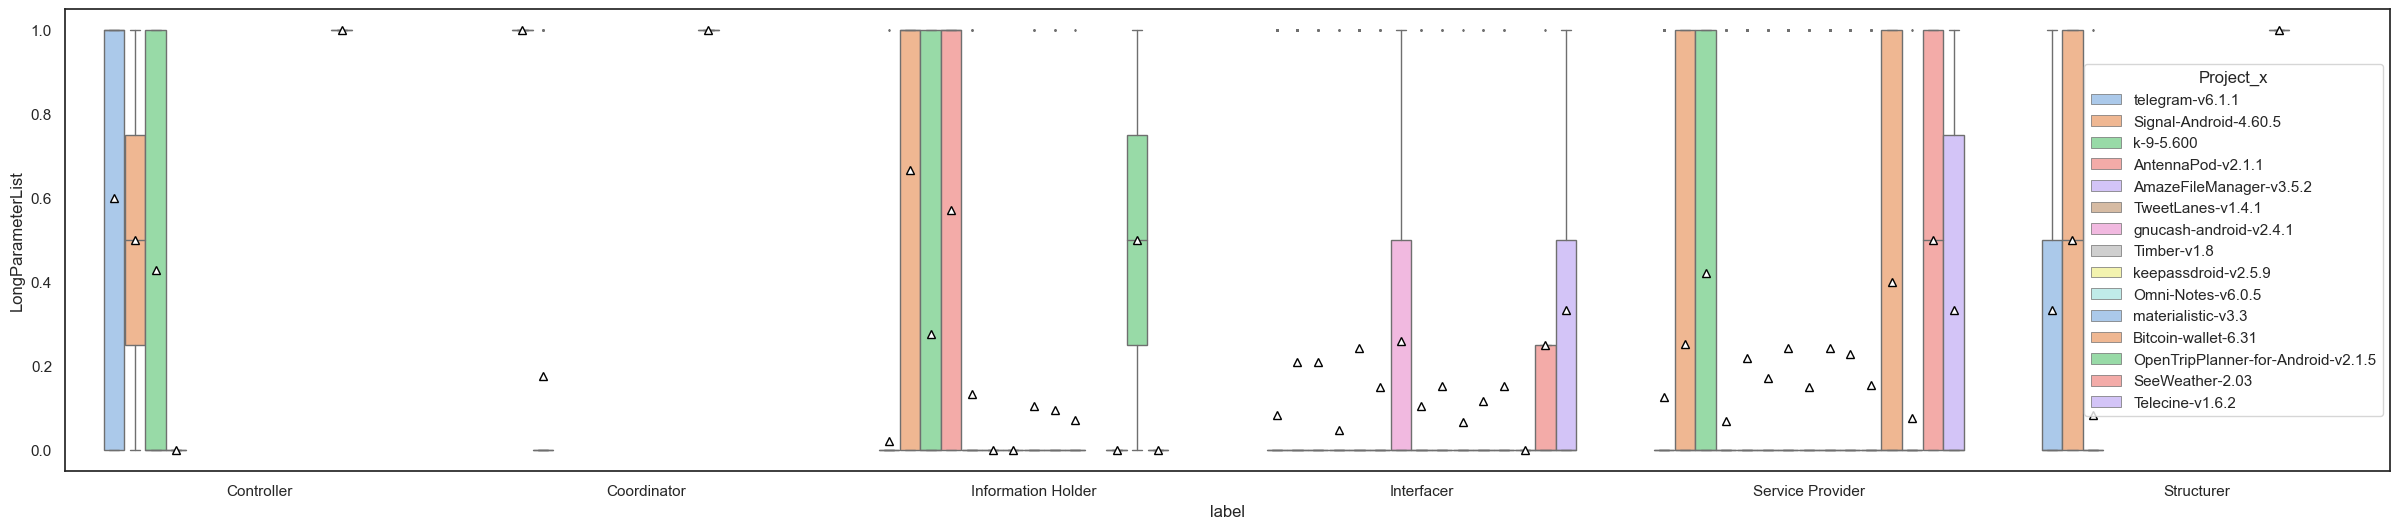

[ManyFieldAttributesButNotComplex]
A class that declares many attributes but which is not complex and, hence, more likely to be some kind of data class holding values without providing behaviour.


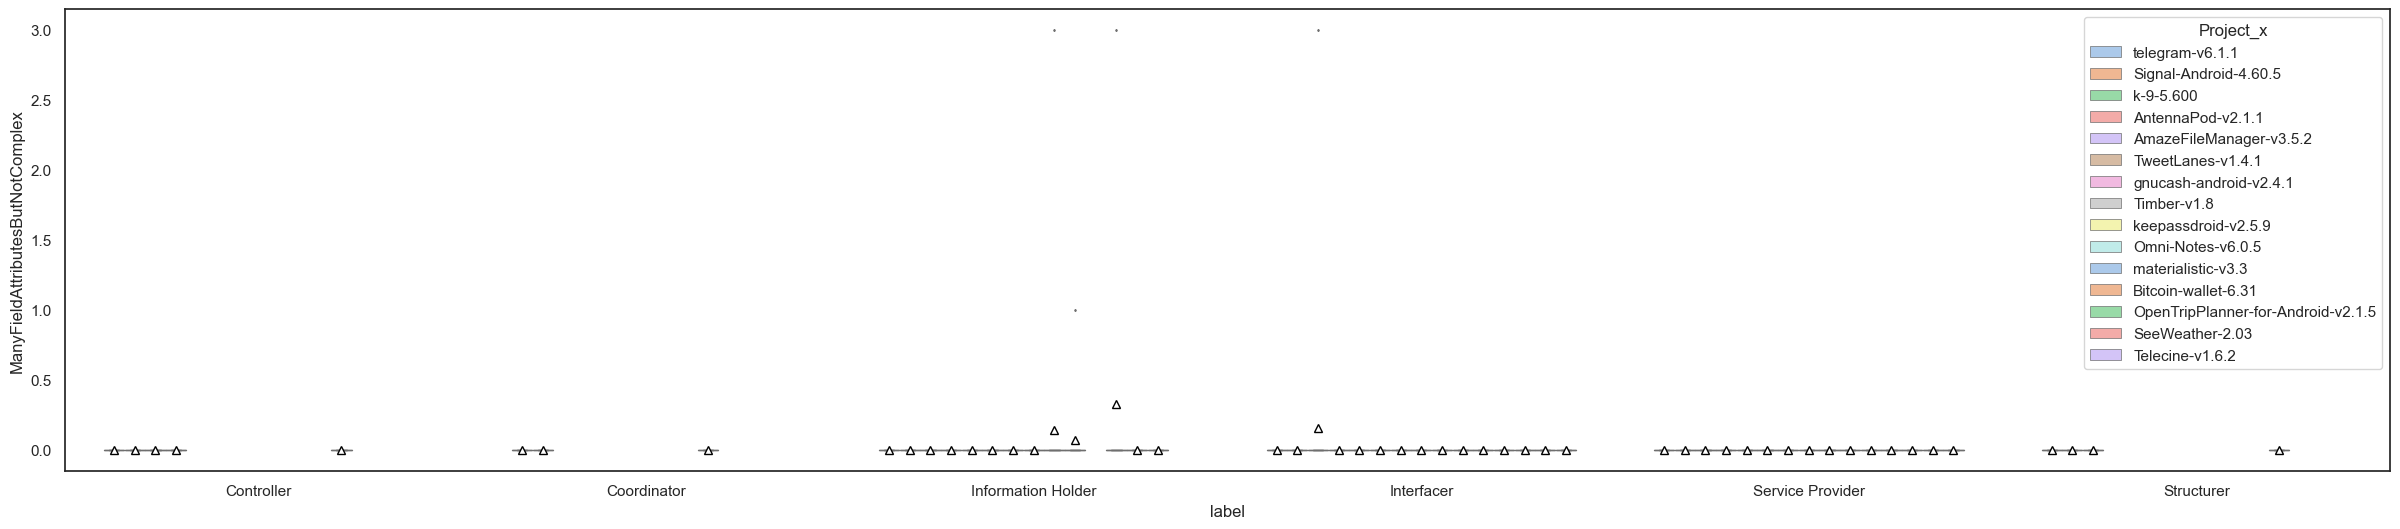

[MessageChains]
A long chain of method invocations performed to implement a class functionality.


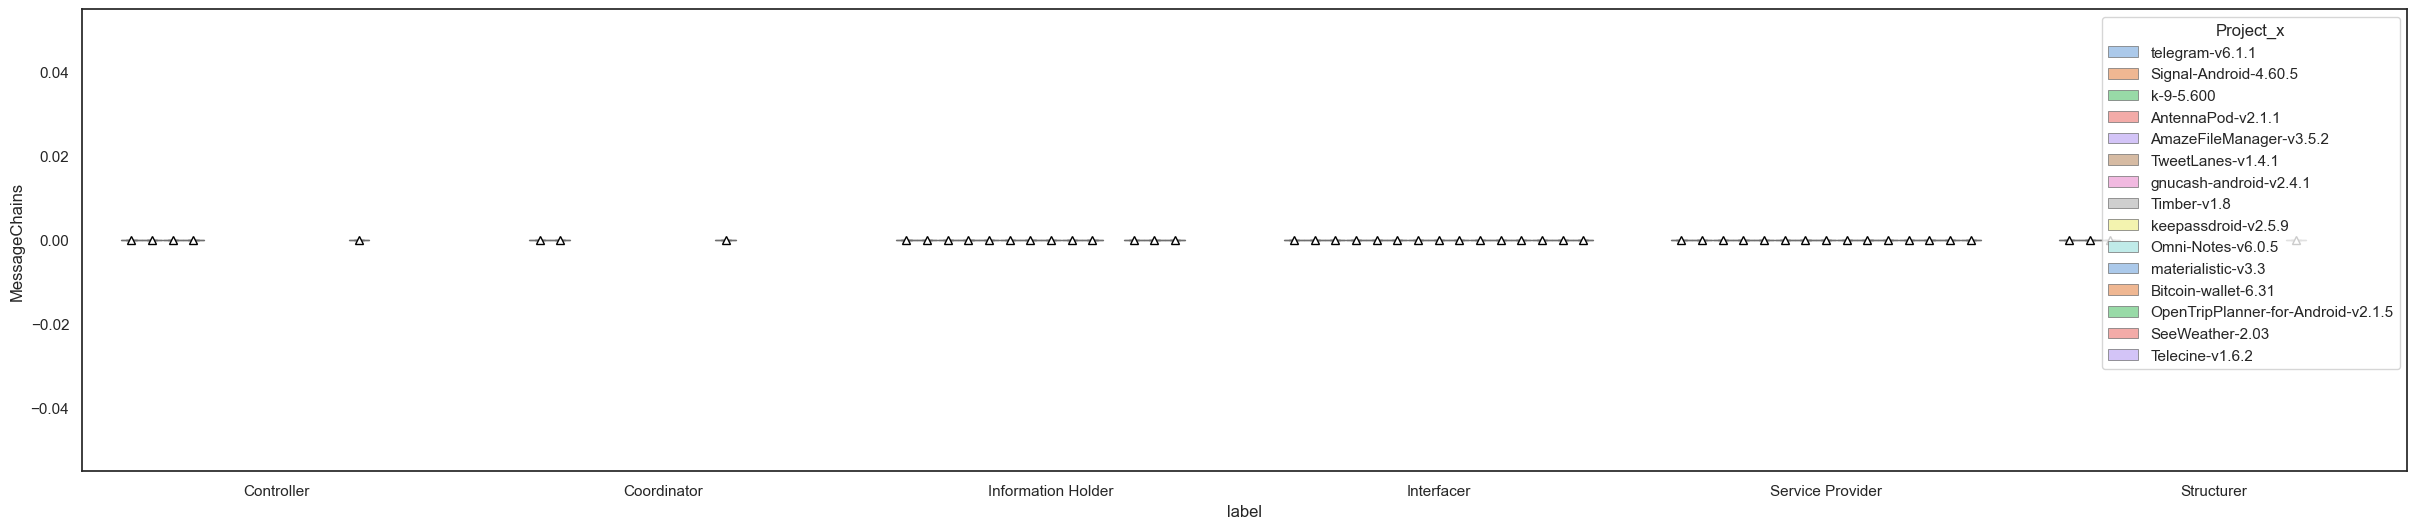

[RefusedParentBequest]
A class redefining most of the inherited methods, thus signaling a wrong hierarchy.


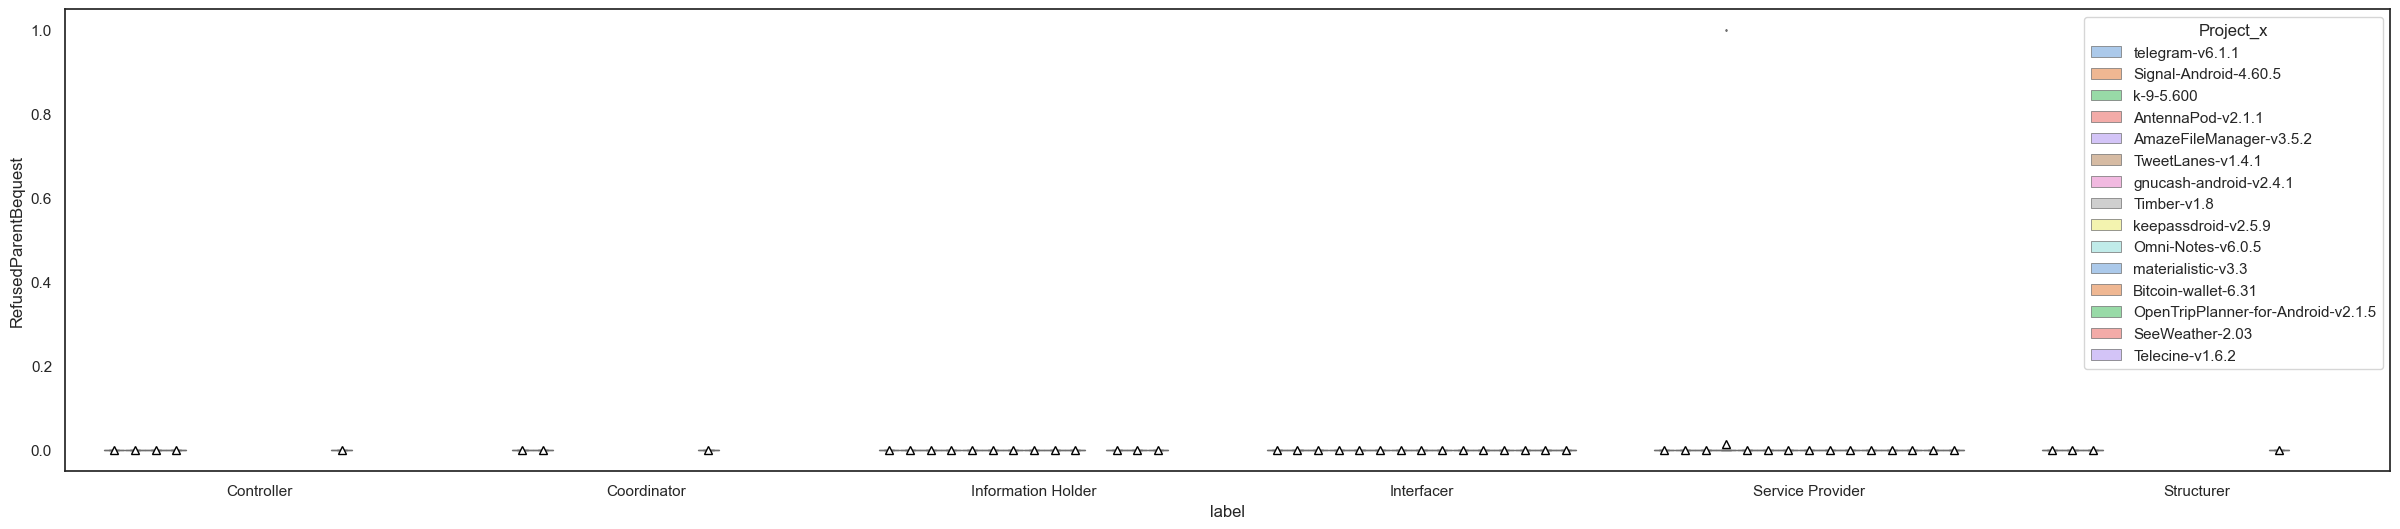

[SpaghettiCode]
A class implementing complex methods interacting between them, with no parameters, using global variables.


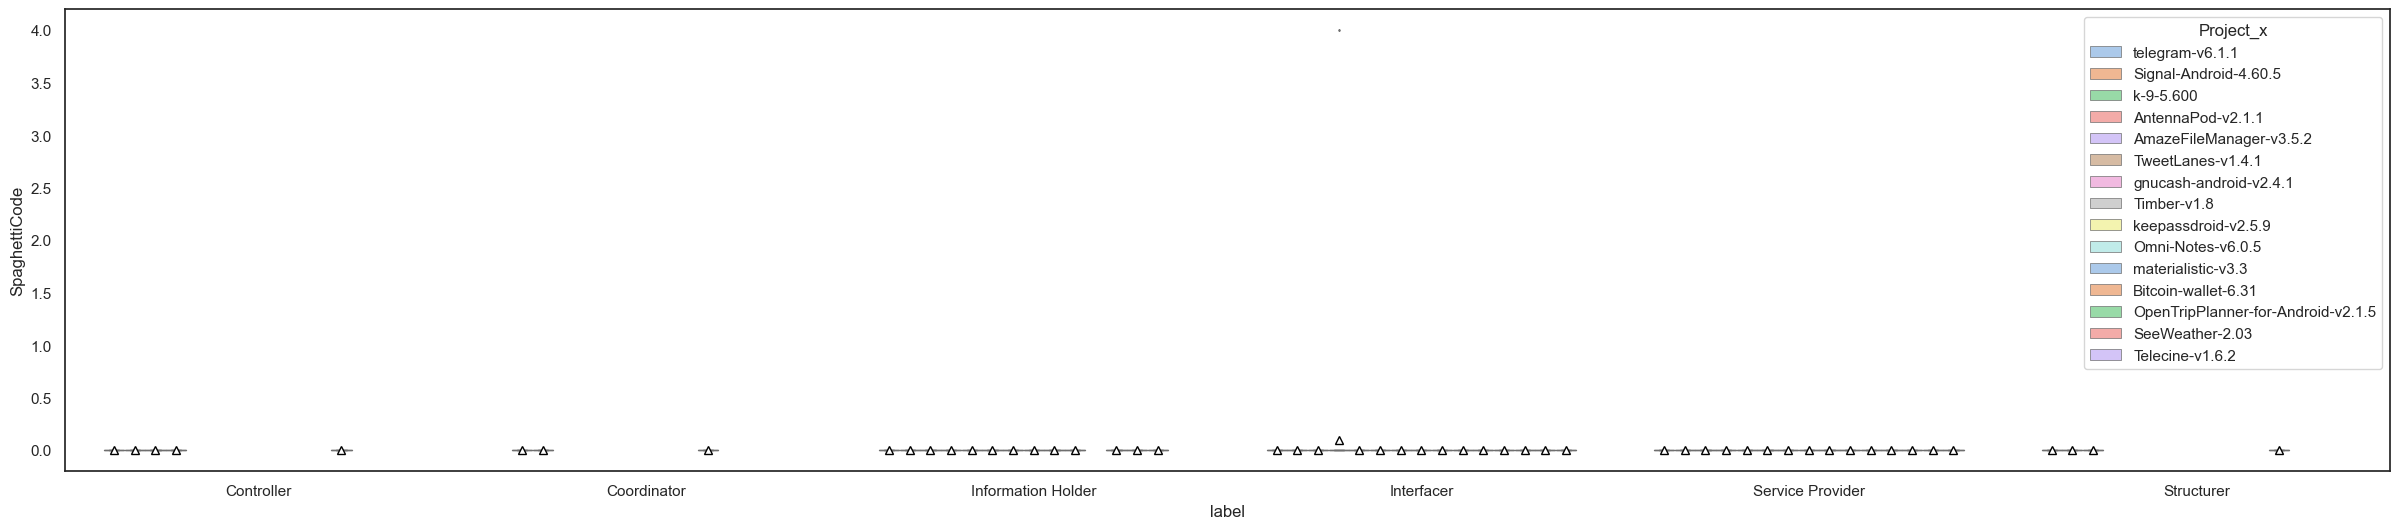

[SpeculativeGenerality]
A class declared as abstract having very few children classes using its methods.


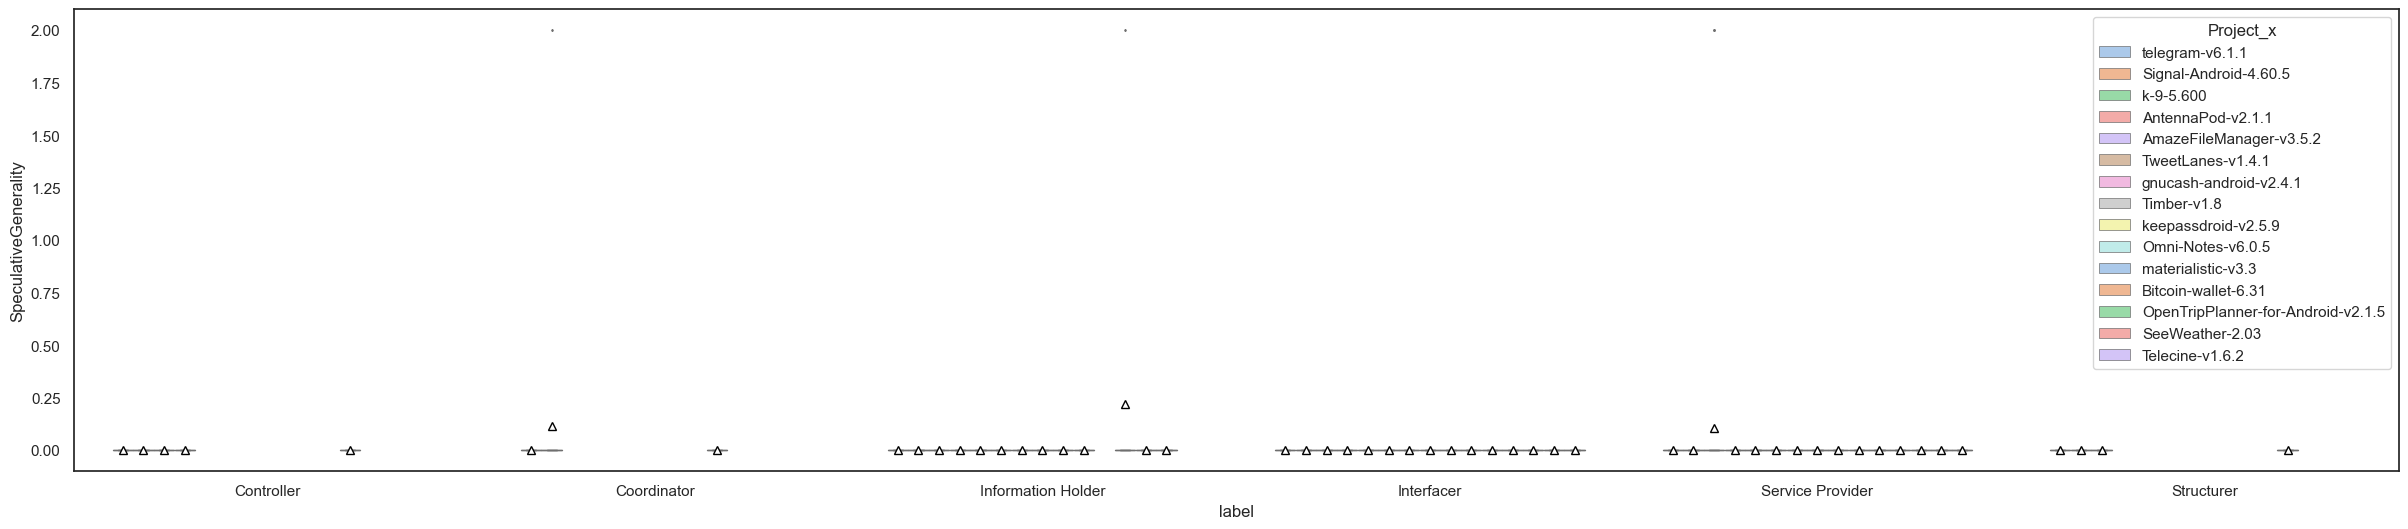

[SwissArmyKnife]
A complex class that offers a high number of services, for example, a complex class implementing a high number of interfaces.


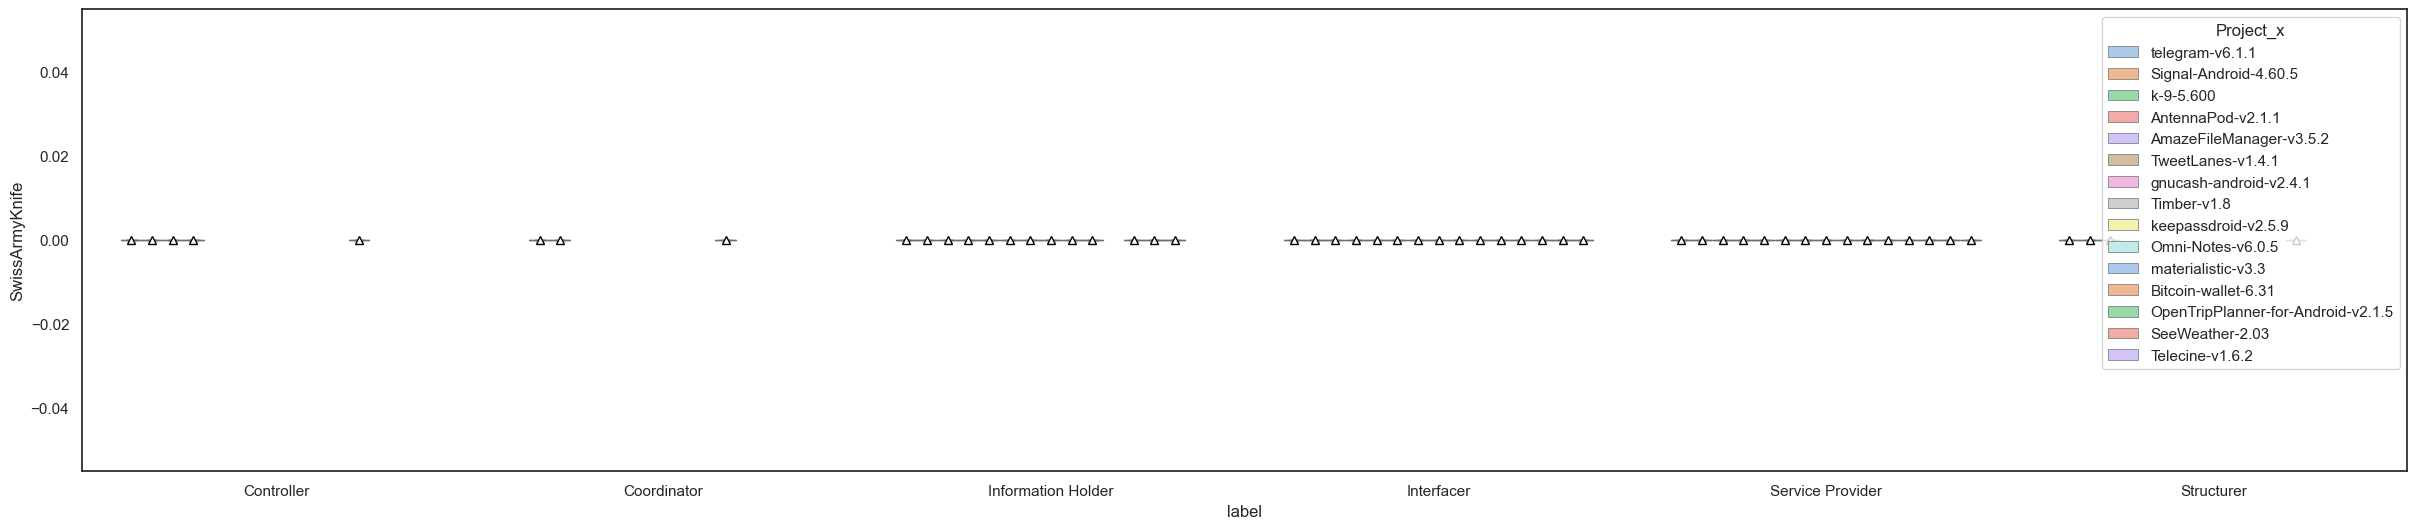

[TraditionBreaker]
A class that inherits from a large parent class but that provides little behaviour and without subclasses.


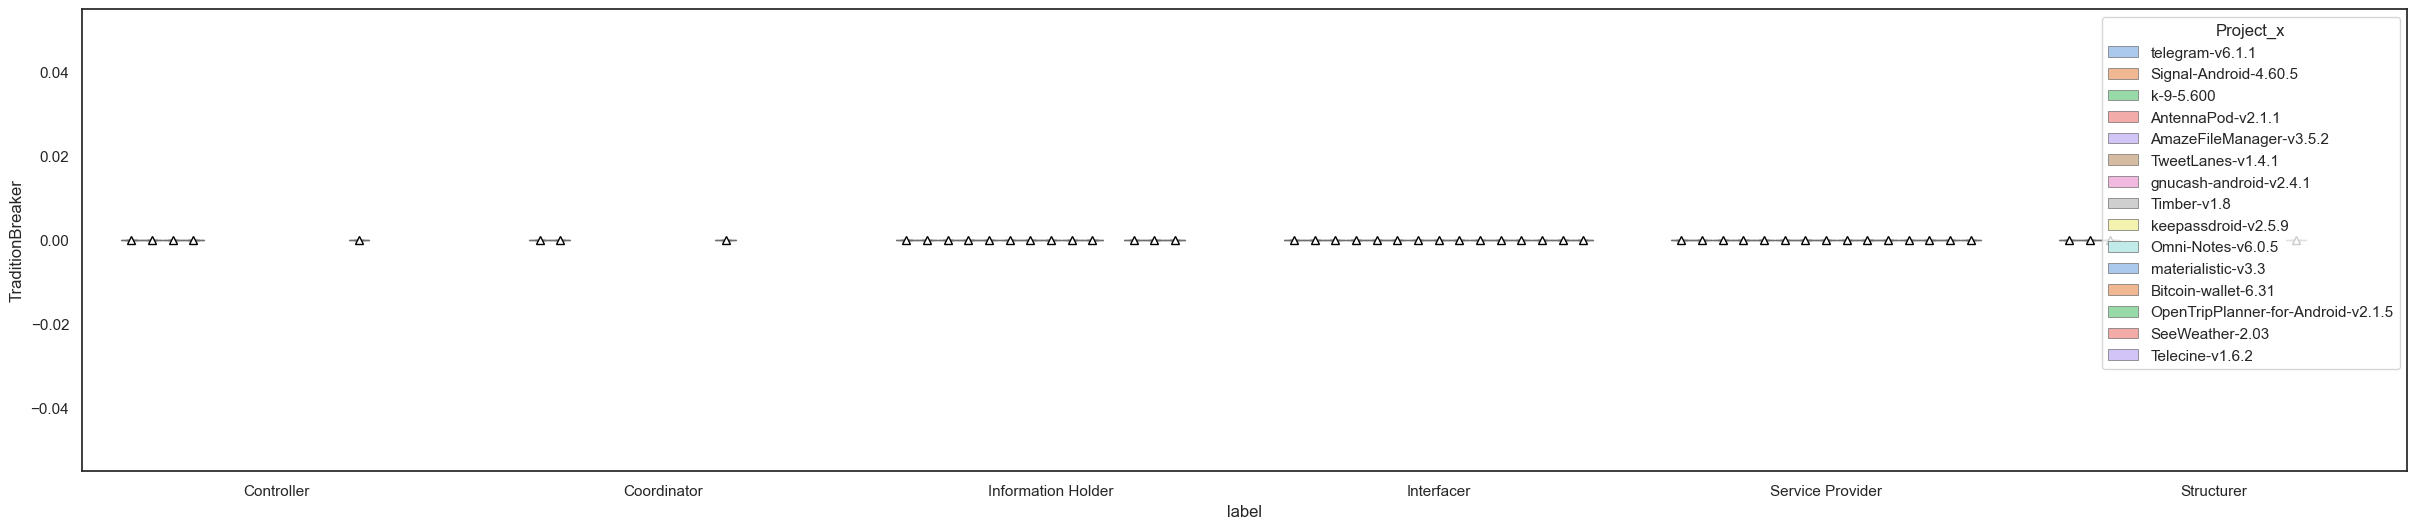

In [210]:
i = 0
for metric in metrics:
  plt.figure(i, figsize=(30,6))
  print(f"[{metric}]")
  if metric in metrics_def.keys():
    print(metrics_def[metric])
  g = sns.boxplot(x="label", y=metric,
      hue="Project_x",
      hue_order=prj_order,
      palette="pastel", 
      order=rstr,
      linewidth=1, fliersize=1,
      showmeans=True,
      meanprops = {"markerfacecolor":"white", "markeredgecolor": "black"},
      data=df_merged)
  mn = df_merged[metric].min()
  mx = df_merged.quantile(.98, interpolation="higher")[metric]
  # g.set(ylim=(mn,mx))
  plt.show()
  i += 1